In [1]:
import numpy as np
import random
import os
import pandas as pd
import cv2
import torch
import torchvision
from xml.etree import ElementTree as et
import shutil
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import argparse

!pip install pytorch_model_summary
!pip install adamp
!pip install torchsummary

from adamp import AdamP
import pytorch_model_summary
import torchsummary

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

In [2]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


In [3]:
!git clone https://github.com/EscVM/OIDv4_ToolKit

Cloning into 'OIDv4_ToolKit'...


In [1]:
pwd

'C:\\Users\\cihat\\OneDrive\\Belgeler\\GitHub\\real-time-obj-detect'

In [13]:
###### DATA ######
old_train_dir = 'OIDv4_ToolKit/OID/Dataset/train/'
old_test_dir = 'OIDv4_ToolKit/OID/Dataset/validation/'
train_img_dir = 'data/images/train'
test_img_dir = 'data/images/valid'
train_label_dir = 'data/labels/train'
test_label_dir = 'data/labels/valid'
classes = ['Car', 'Tree']
img_w, img_h = 480, 480

###### MODEL ######
model_name = "Yolov5"
opt_name = "Adam"
lr = 0.001
epoch = 30

In [5]:
%pwd

'C:\\Users\\cihat\\OneDrive\\Belgeler\\GitHub\\real-time-obj-detect'

In [14]:
!mkdir data
!mkdir data\images
!mkdir data\labels
!mkdir data\images\train
!mkdir data\images\valid
!mkdir data\labels\train
!mkdir data\labels\valid

A subdirectory or file data already exists.
A subdirectory or file data\images already exists.
A subdirectory or file data\labels already exists.
A subdirectory or file data\images\train already exists.
A subdirectory or file data\images\valid already exists.
A subdirectory or file data\labels\train already exists.
A subdirectory or file data\labels\valid already exists.


In [21]:
def get_files_count(folder_path):
    dirListing = os.listdir(folder_path)
    return len(dirListing)

len_train = get_files_count(old_train_dir)
len_test = get_files_count(old_test_dir)
print(f'#train = {len_train}, #test = {len_test}') # 1968, 784

train_cnt, test_cnt = 0, 0
for train_file in os.listdir(old_train_dir):
    etc, ext = train_file.split('.')
    if ext == 'jpg':
        dir_from = os.path.join(old_train_dir, train_file)
        img_from = cv2.imread(dir_from, cv2.IMREAD_UNCHANGED)
        img_rgb = cv2.cvtColor(img_from, cv2.COLOR_BGR2RGB).astype(np.float32)
        img_res = cv2.resize(img_rgb, (480, 480), cv2.INTER_AREA)
        dir_to = os.path.join(train_img_dir, train_file)
        cv2.imwrite(dir_to, img_from)
    train_cnt += 1
for test_file in os.listdir(old_test_dir):
    etc, ext = test_file.split('.')
    if ext == 'jpg':
        dir_from = os.path.join(old_test_dir, test_file)
        img_from = cv2.imread(dir_from, cv2.IMREAD_UNCHANGED)
        img_rgb = cv2.cvtColor(img_from, cv2.COLOR_BGR2RGB).astype(np.float32)
        img_res = cv2.resize(img_rgb, (512, 512), cv2.INTER_AREA)
        dir_to = os.path.join(test_img_dir, test_file)
        cv2.imwrite(dir_to, img_from)
    test_cnt += 1

#train = 1968, #test = 784


In [24]:
new_len_train_img = get_files_count('data/images/train')
new_len_train_label = get_files_count('data/labels/train')
new_len_valid_img = get_files_count('data/images/valid')
new_len_valid_label = get_files_count('data/labels/valid')

print(new_len_train_img, new_len_train_label, new_len_valid_img, new_len_valid_label)

984 984 392 392


In [25]:
import yaml

data_yaml = dict(
    train = '../data/images/train',
    val = '../data/images/train',
    nc = 2,
    names = ['Car','Tree']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [28]:
!cd yolov5 && python train.py --img 512 --batch 16 --epochs 10 --data data.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v7.0-56-gc0ca1d2 Python-3.9.13 torch-1.8.1+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

In [48]:
!cd yolov5 && python train.py --img 512 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   79c05e5..fdc35b1  master     -> origin/master
github:  YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v7.0-56-gc0ca1d2 Python-3.9.13 torch-1.8.1+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\cihat/.cache\torch\hub\master.zip
YOLOv5  2023-1-10 Python-3.9.13 torch-1.8.1+cu111 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
pwd

'C:\\Users\\cihat\\OneDrive\\Belgeler\\GitHub\\real-time-obj-detect'

In [3]:

img=cv2.imread("images/1cc2814050a3f191.jpg")
#cv2.imshow("resim",img)
imgresize=cv2.resize(img, (768, 1024))
h,w,c=imgresize.shape
print('width: ', w)
print('height:', h)
position_w=int((w/2)-200),int(w)
position_h=int((h/2)+50),int(-h)

cropped_image = imgresize[int((w-w)):int(h),int(w-550):int(h-425)]
#cropped_image = img[position_w, position_h]
cv2.waitKey(0)
cv2.destroyAllWindows()

width:  768
height: 1024


In [4]:
results = model(cropped_image)
#temp = results.crop()

In [5]:
results.print()

image 1/1: 1024x381 3 Cars
Speed: 3.0ms pre-process, 148.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 256)


In [6]:
temp = results.pandas().xyxy[0].value_counts('name')

In [7]:
temp = temp.to_dict()

In [8]:
from pygame import mixer
mixer.init()
def voice(temp):
    for key, value in temp.items():
        if(key == 'Car'):
            mixer.music.load('voice/araba.wav') 
            mixer.music.play()
            mixer.music.unpause()
        if(key == 'Tree'):
            mixer.music.load('voice/agac.wav') 
            mixer.music.play()

pygame 2.1.2 (SDL 2.0.18, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


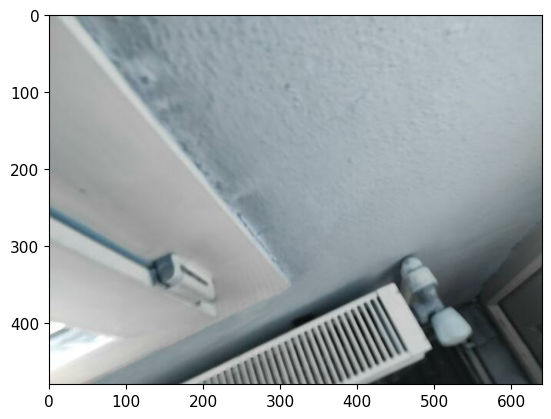

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
voice(temp)

In [10]:
#Kameraya bağlanma
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    # Make detections
    
    results = model(frame)
    
    cv2.imshow('molo', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [6]:
cd yolov5/

C:\Users\cihat\OneDrive\Belgeler\GitHub\real-time-obj-detect\yolov5


In [12]:
!python detect.py --weights runs\train\exp2\weights\best.pt --img 600 --conf 0.40 --source images

detect: weights=['runs\\train\\exp2\\weights\\best.pt'], source=images, data=data\coco128.yaml, imgsz=[600, 600], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-56-gc0ca1d2 Python-3.9.13 torch-1.8.1+cu111 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING  --img-size [600, 600] must be multiple of max stride 32, updating to [608, 608]
image 1/9 C:\Users\cihat\OneDrive\Belgeler\GitHub\real-time-obj-detect\yolov5\images\1_10.jpg: 608x480 (no detections), 268.2ms
image 2/9 C:\Users\cihat\OneDrive\Belgeler\GitHub\real-time-obj-detect\yolov5\images\1cc2814050a3f191.jpg: 608x608 3 Cars, 336.3ms
image 3/9 C:\Users\cihat\OneDrive\

In [3]:
cd yolov5/

C:\Users\cihat\OneDrive\Belgeler\GitHub\real-time-obj-detect\yolov5


In [5]:
!python export.py --weights runs/train/exp2/weights/best.pt --include tflite

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 640, 640, 3)]   0           []                               
                                                                                                  
 tf_conv (TFConv)               (1, 320, 320, 32)    3488        ['input_1[0][0]']                
                                                                                                  
 tf_conv_1 (TFConv)             (1, 160, 160, 64)    18496       ['tf_conv[0][0]']                
                                                                                                  
 tfc3 (TFC3)                    (1, 160, 160, 64)    18624       ['tf_conv_1[0][0]']              
                                                                                              

export: data=C:\Users\cihat\OneDrive\Belgeler\GitHub\real-time-obj-detect\yolov5\data\coco128.yaml, weights=['runs/train/exp2/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5  v7.0-56-gc0ca1d2 Python-3.9.13 torch-1.8.1+cu111 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs\train\exp2\weights\best.pt with output shape (1, 25200, 7) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.10.1...

                 from  n    params  module                                  arguments                     
2023-01-10 01:20:34.514124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dl